<a href="https://colab.research.google.com/github/mateusms-p4/Mateusms_Inatel/blob/master/Bananas_IN243.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
dados = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/projeto/bananas.csv')

In [0]:
dados.head()

,temperatura,humidade,cor,pronto_para_consumo
0,9.590963,97.007535,verde,NAO
1,18.081287,96.467236,verde,NAO
2,12.884049,95.604222,amarela,SIM
3,18.831052,96.641953,amarela,NAO
4,13.539014,92.978037,preta,NAO


In [0]:
dados.shape

(1000, 4)

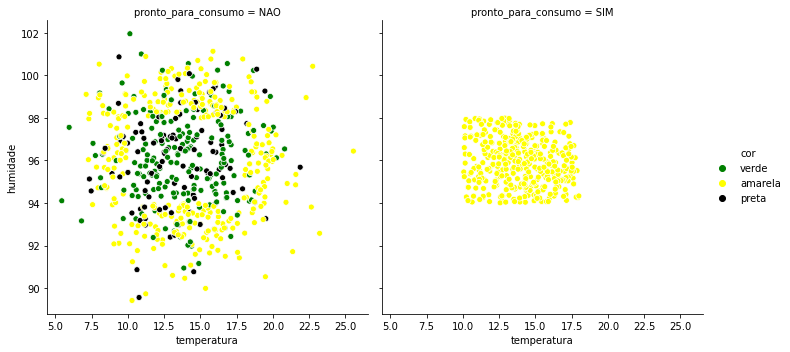

In [0]:
sns.relplot(x='temperatura', y='humidade',hue='cor', col='pronto_para_consumo', palette= ['green','yellow','black'] , data=dados)

In [0]:
swap = {'SIM': 1, 'NAO': 0}
dados['pronto_para_consumo'] = dados['pronto_para_consumo'].map(swap)

In [0]:
cores = dados['cor'].str.get_dummies()

In [0]:
cores.sum()

amarela    703
preta      103
verde      194
dtype: int64

In [0]:
dados_bananas = pd.concat([dados, cores], axis=1)
dados_bananas.drop(['cor'], axis = 1)
dados_bananas = dados_bananas[['temperatura', 'humidade', 'amarela', 'preta', 'verde', 'pronto_para_consumo']]
dados_bananas.head()

,temperatura,humidade,amarela,preta,verde,pronto_para_consumo
0,9.590963,97.007535,0,0,1,0
1,18.081287,96.467236,0,0,1,0
2,12.884049,95.604222,1,0,0,1
3,18.831052,96.641953,1,0,0,0
4,13.539014,92.978037,0,1,0,0


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
x = dados_bananas[['temperatura', 'humidade', 'amarela', 'preta', 'verde']]
y = dados_bananas['pronto_para_consumo']

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

In [0]:
from sklearn.dummy import DummyClassifier

In [0]:
dummy_stratified = DummyClassifier(strategy='most_frequent')
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y) * 100

60.8

In [0]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

In [0]:
model_svc = SVC(random_state=20)
model_svc.fit(treino_x, treino_y)
previsoes_svc = model_svc.predict(teste_x)

acc_svc = accuracy_score(teste_y, previsoes_svc)
print(f'Accuracy SVC: {acc_svc*100}')

Accuracy SVC: 96.8


In [0]:
model_lsvc = LinearSVC()
model_lsvc.fit(treino_x, treino_y)
previsoes_lsvc = model_lsvc.predict(teste_x)

acc_lsvc = accuracy_score(teste_y, previsoes_lsvc)
print(f'Accuracy Linear SVC: {acc_lsvc*100}')

Accuracy Linear SVC: 71.2


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
model_dtree = DecisionTreeClassifier()
model_dtree.fit(treino_x, treino_y)
previsoes_dtree = model_dtree.predict(teste_x)

acc_dtree = accuracy_score(teste_y, previsoes_dtree)
print(f'Accuracy Decision Tree: {acc_dtree*100}')

Accuracy Decision Tree: 99.2


In [0]:
data_input = scaler.transform(x)

df_previsoes_svc = pd.DataFrame(model_svc.predict(data_input), columns=['previsoes'])
df_previsoes_lsvc = pd.DataFrame(model_lsvc.predict(data_input), columns=['previsoes'])
df_previsoes_dtree = pd.DataFrame(model_dtree.predict(data_input), columns=['previsoes'])

In [0]:
acc_svc = accuracy_score(y, df_previsoes_svc)
print(f'Accuracy SVC: {acc_svc*100}')

Accuracy SVC: 96.1


In [0]:
acc_lsvc = accuracy_score(y, df_previsoes_lsvc)
print(f'Accuracy Linear SVC: {acc_lsvc*100}')

Accuracy Linear SVC: 74.1


In [0]:
acc_dtree = accuracy_score(y, df_previsoes_dtree)
print(f'Accuracy Decision Tree: {acc_dtree*100}')

Accuracy Decision Tree: 99.8


In [0]:
dados_bananas_svc = pd.concat([dados_bananas, df_previsoes_svc], axis=1)
dados_bananas_lsvc = pd.concat([dados_bananas, df_previsoes_lsvc], axis=1)
dados_bananas_dtree = pd.concat([dados_bananas, df_previsoes_dtree], axis=1)

In [0]:
def acertou(row):
    if row['pronto_para_consumo'] == row['previsoes']:
        return True
    else:
        return False

In [0]:
dados_bananas_svc['acertou'] = dados_bananas_svc.apply(acertou, axis=1)
dados_bananas_lsvc['acertou'] = dados_bananas_lsvc.apply(acertou, axis=1)
dados_bananas_dtree['acertou'] = dados_bananas_dtree.apply(acertou, axis=1)

In [0]:
accuracy_score(dados_bananas_svc['pronto_para_consumo'], dados_bananas_svc['previsoes'])*100

96.1

In [0]:
dados_bananas_svc['acertou'].value_counts()

True     961
False     39
Name: acertou, dtype: int64

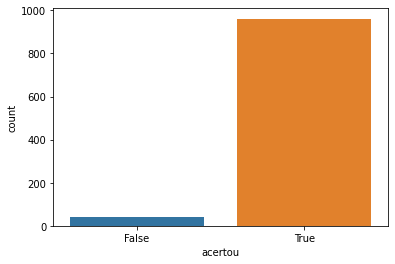

In [0]:
sns.countplot(x='acertou', data=dados_bananas_svc)

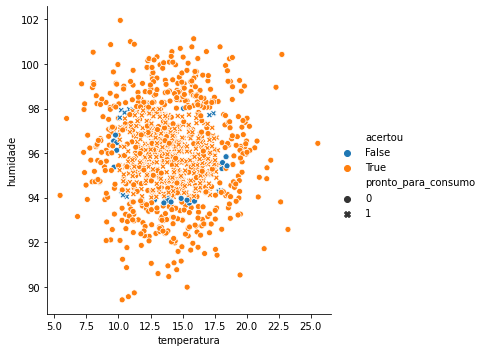

In [0]:
sns.relplot(x='temperatura', y='humidade', style='pronto_para_consumo', hue='acertou', data=dados_bananas_svc)

In [0]:
accuracy_score(dados_bananas_lsvc['pronto_para_consumo'], dados_bananas_lsvc['previsoes'])*100

74.1

In [0]:
dados_bananas_lsvc['acertou'].value_counts()

True     741
False    259
Name: acertou, dtype: int64

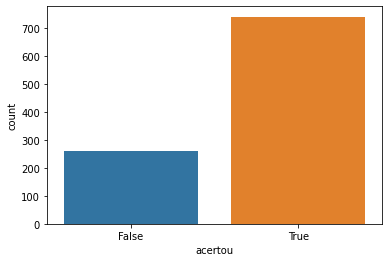

In [0]:
sns.countplot(x='acertou', data=dados_bananas_lsvc)

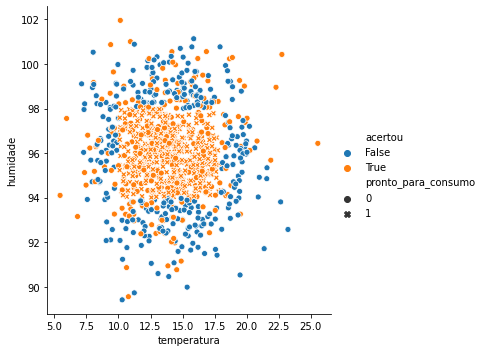

In [0]:
sns.relplot(x='temperatura', y='humidade', style='pronto_para_consumo', hue='acertou', data=df_bananas_lsvc)

In [0]:
accuracy_score(dados_bananas_dtree['pronto_para_consumo'], dados_bananas_dtree['previsoes'])*100

99.8

In [0]:
dados_bananas_dtree['acertou'].value_counts()

True     998
False      2
Name: acertou, dtype: int64

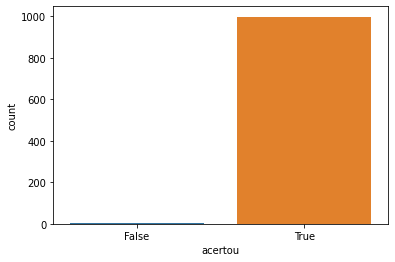

In [0]:
sns.countplot(x='acertou', data=dados_bananas_dtree)

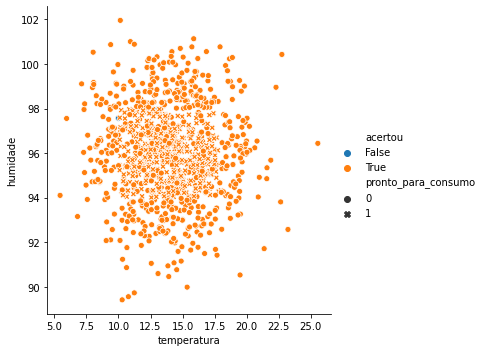

In [0]:
sns.relplot(x='temperatura', y='humidade', style='pronto_para_consumo', hue='acertou', data=df_bananas_dtree)

[Text(697.5, 830.5, 'amarela <= -0.43\ngini = 0.476\nsamples = 750\nvalue = [457, 293]\nclass = no'),
 Text(558.0, 679.5, 'gini = 0.0\nsamples = 227\nvalue = [227, 0]\nclass = no'),
 Text(837.0, 679.5, 'humidade <= 0.991\ngini = 0.493\nsamples = 523\nvalue = [230, 293]\nclass = yes'),
 Text(697.5, 528.5, 'humidade <= -0.964\ngini = 0.438\nsamples = 433\nvalue = [140, 293]\nclass = yes'),
 Text(279.0, 377.5, 'humidade <= -0.984\ngini = 0.026\nsamples = 75\nvalue = [74, 1]\nclass = no'),
 Text(139.5, 226.5, 'gini = 0.0\nsamples = 72\nvalue = [72, 0]\nclass = no'),
 Text(418.5, 226.5, 'humidade <= -0.977\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = no'),
 Text(279.0, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = yes'),
 Text(558.0, 75.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = no'),
 Text(1116.0, 377.5, 'temperatura <= 1.362\ngini = 0.301\nsamples = 358\nvalue = [66, 292]\nclass = yes'),
 Text(976.5, 226.5, 'temperatura <= -1.332\ngini = 0.169\nsamples = 322\nva

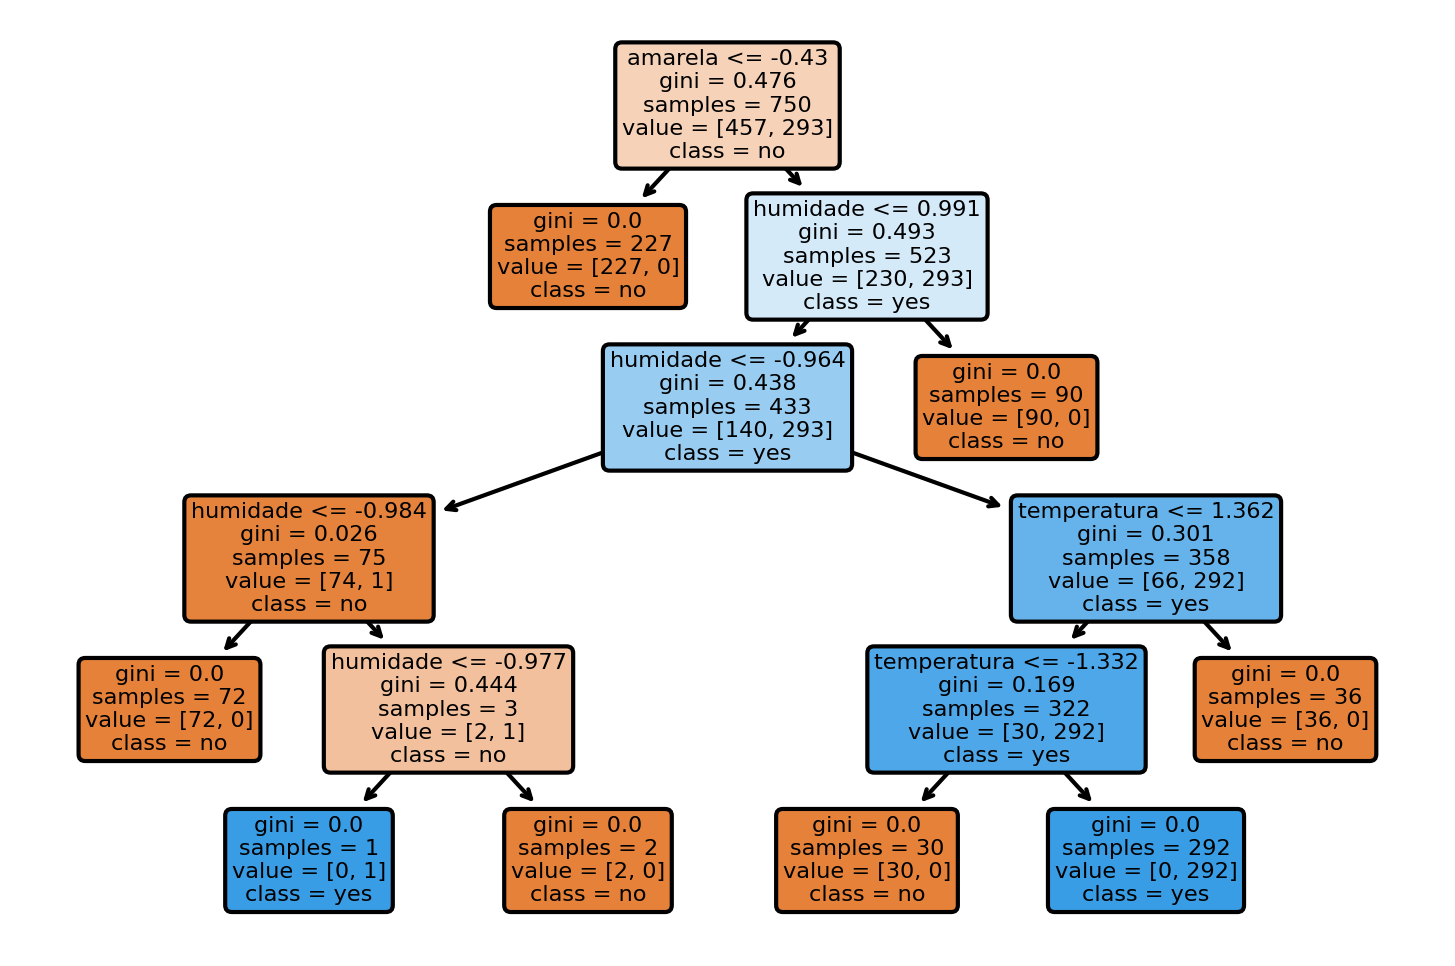

In [0]:
from sklearn.tree import plot_tree

features = x.columns

plt.figure(dpi=300)
plot_tree(model_dtree, filled=True, feature_names=features, rounded=True, class_names= ['no', 'yes'])